**DECISION TREE**

Importing libraries

In [112]:
import torch
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from dataset import TimeSeriesDataset
from dataset import NumpyToTensor
import sklearn
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Importing data

In [63]:
train_dataa = pd.read_csv("data/train_delhi_aqi.csv")
test_dataa = pd.read_csv("data/test_delhi_aqi.csv")

In [141]:
# need to be tuned:
sequence_size = 10
num_levels = 6
min_samples_split = 1/(13*6)
min_samples_leaf = None

Setting up dataloader

In [133]:
train_data = TimeSeriesDataset(train_dataa,sequence_size)
# train_dataloader = DataLoader(dataset=train_data, batch_size = math.ceil(len(train_data)/(12*13)), shuffle=False, num_workers=2)
train_dataloader = DataLoader(dataset=train_data, batch_size = 10000, shuffle=False, num_workers=2)

Converting the dataloader into an iterable

In [117]:
dataiter = iter(train_dataloader)

In [118]:
data = next(dataiter)

Creating the tree classes

In [119]:
# # Fit regression model
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(X, y)
# regr_2.fit(X, y)

# # Predict
# X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# y_1 = regr_1.predict(X_test)
# y_2 = regr_2.predict(X_test)


In [142]:
tree6 = DecisionTreeRegressor(max_depth=10, criterion='absolute_error', min_samples_split=min_samples_split)#, min_samples_leaf=min_samples_leaf)

# tree2= DecisionTreeRegressor(max_depth=2, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# tree5= DecisionTreeRegressor(max_depth=5, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

tree10= DecisionTreeRegressor(max_depth=10, criterion='squared_error', min_samples_split=min_samples_split)#, min_samples_leaf=min_samples_leaf)

tree7= DecisionTreeRegressor(max_depth=7, criterion='squared_error', min_samples_split=min_samples_split)#, min_samples_leaf=min_samples_leaf)

Training Loop

In [143]:
epochs = 2
size = len(train_data)
niters = math.ceil(size/100)
print(size, niters)

2516544 25166


In [144]:
for ep in range(epochs):
    for i, (x, y) in enumerate(train_dataloader):
        # tree2.fit(x,y)
        tree10.fit(x,y)
        # tree5.fit(x,y)
        tree6.fit(x,y)
        tree7.fit(x,y)
        if i%10==0:
            ypred6 = tree6.predict(x)
            # ypred5 = tree5.predict(x)
            ypred7 = tree7.predict(x)
            ypred10 = tree10.predict(x)
            # ypred2 = tree2.predict(x)
            err6 = mean_squared_error(y,ypred6)
            err7 = mean_squared_error(y,ypred7)
            # err2 = mean_squared_error(y,ypred2)
            err10 = mean_squared_error(y,ypred10)
            # err5 = mean_squared_error(y,ypred5)
            # print(f'Epoch {ep}, Iteration {i}, tree 2, train error: {err2}')
            print(f'Epoch {ep}, Iteration {i}, tree 10, train mse: {err10}, train mae: {mean_absolute_error(y,ypred10)}')
            # print(f'Epoch {ep}, Iteration {i}, tree 5, train error: {err5}')
            print(f'Epoch {ep}, Iteration {i}, tree 6, train mse: {err6}, train mae: {mean_absolute_error(y,ypred6)}')
            print(f'Epoch {ep}, Iteration {i}, tree 7, train mse: {err7}, train mae: {mean_absolute_error(y,ypred7)}')
    print(f'epoch {ep}/{epochs} completed')
    break

Epoch 0, Iteration 0, tree 10, train mse: 10.237296099826793, train mae: 1.036382143197756
Epoch 0, Iteration 0, tree 6, train mse: 23.95106099028639, train mae: 1.1896237418879028
Epoch 0, Iteration 0, tree 7, train mse: 10.425508837350513, train mae: 1.1953236649259904
Epoch 0, Iteration 10, tree 10, train mse: 6.074373209692263, train mae: 1.0575142535169522
Epoch 0, Iteration 10, tree 6, train mse: 8.143138055635601, train mae: 1.1127520863658094
Epoch 0, Iteration 10, tree 7, train mse: 6.2581853606293105, train mae: 1.2111862552251755
Epoch 0, Iteration 20, tree 10, train mse: 5.861055184130788, train mae: 1.0957834182709882
Epoch 0, Iteration 20, tree 6, train mse: 4.602052706862529, train mae: 1.0026647104170117
Epoch 0, Iteration 20, tree 7, train mse: 6.253591759522449, train mae: 1.3574515269271037
Epoch 0, Iteration 30, tree 10, train mse: 11.4248718127926, train mae: 1.095246121558769
Epoch 0, Iteration 30, tree 6, train mse: 12.634464466073744, train mae: 1.07338273574039

KeyboardInterrupt: 

In [145]:
i

43

Testing Loop

In [146]:
test_data = TimeSeriesDataset(test_dataa,sequence_size)
test_dataloader = DataLoader(dataset=test_data, batch_size = 1, shuffle=False, num_workers = 3)
len(test_data)

139800

In [147]:
#calc error
# errs2 = torch.empty((len(test_data),1))
errs10 = torch.empty((len(test_data),1))
# errs5 = torch.empty((len(test_data),1))
errs6 = torch.empty((len(test_data),1))
errs7 = torch.empty((len(test_data),1))
# preds5 = np.empty((len(test_data),1))
preds6 = np.empty((len(test_data),1))
preds7 = np.empty((len(test_data),1))
preds10 = np.empty((len(test_data),1))
Y = torch.empty((len(test_data),1))
for ep in range(1):
    for i, (x,y) in enumerate(test_dataloader):
        Y[i] = y
        ypred6 = tree6.predict(x)
        # preds5[i] = ypred6
        # ypred5 = tree5.predict(x)
        ypred6 = tree6.predict(x)
        preds6[i] = ypred6
        
        ypred7 = tree7.predict(x)
        preds7[i] = ypred7
        
        ypred10 = tree10.predict(x)
        preds10[i] = ypred10
        # ypred2 = tree2.predict(x)
        err6 = mean_squared_error(y,ypred6)
        err7 = mean_squared_error(y,ypred7)
        # err2 = mean_squared_error(y,ypred2)
        err10 = mean_squared_error(y,ypred10)
        # err5 = mean_squared_error(y,ypred5)
        # errs2[i] = mean_squared_error(y,ypred2)
        errs10[i] = mean_squared_error(y,ypred10)
        # errs5[i] = mean_squared_error(y,ypred5)
        errs6[i] = mean_squared_error(y,ypred6)
        errs7[i] = mean_squared_error(y,ypred7)

In [148]:
i

139799

In [149]:
from sklearn.metrics import r2_score

In [151]:
# print(f'Tree2 max error: {torch.max(errs2)}, min error: {torch.min(errs2)}, mean error: {torch.sum(errs2)/i}')
print(f'Tree10 max error: {torch.max(errs10)}, min error: {torch.min(errs10)}, mean error: {torch.sum(errs10)/i}')
print(f'mse: {mean_squared_error(Y,preds10)}, R2 score: {r2_score(Y,preds10)}, mae: {mean_absolute_error(Y,preds10)}')
print('\n')
# print(f'Tree5 max error: {torch.max(errs5)}, min error: {torch.min(errs5)}, mean error: {torch.sum(errs5)/i}')
# print(f'mean error using the entire set: {mean_squared_error(Y, preds5)}, R2 score: {r2_score(Y,preds5)}')
# print('\n')
print(f'Tree6 max error: {torch.max(errs6)}, min error: {torch.min(errs6)}, mean error: {torch.sum(errs6)/i}')
print(f'mse: {mean_squared_error(Y, preds6)}, R2 score: {r2_score(Y,preds6)}, mae: {mean_absolute_error(Y,preds6)}')
print('\n')
print(f'Tree7 max error: {torch.max(errs7)}, min error: {torch.min(errs7)}, mean error: {torch.sum(errs7)/i}')
print(f'mse: {mean_squared_error(Y, preds7)}, R2 score: {r2_score(Y,preds7)}, mae: {mean_absolute_error(Y,preds7)}')

Tree10 max error: 528.93505859375, min error: 3.958188478036949e-26, mean error: 4.260044097900391
mse: 4.260014357405595, R2 score: 0.9988875690352995, mae: 0.8936441700657562


Tree6 max error: 459.95989990234375, min error: 0.0, mean error: 3.3201146125793457
mse: 3.3200905863768924, R2 score: 0.9991330142896172, mae: 0.687844762876988


Tree7 max error: 614.0735473632812, min error: 6.127574891934273e-09, mean error: 2.6592984199523926
mse: 2.6592790934287853, R2 score: 0.9993055740757849, mae: 0.7089702697786154


Validation Set

In [152]:
valid = pd.read_csv("data/val_delhi_aqi.csv")
validation_data = TimeSeriesDataset(valid,sequence_size)
validation_dataloader = DataLoader(dataset=validation_data, batch_size=1,shuffle=False, num_workers=3)
len(validation_data)

139800

In [157]:
#calc error
# errs2 = torch.empty((len(test_data),1))
errs10 = torch.empty((len(test_data),1))
# errs5 = torch.empty((len(test_data),1))
errs6 = torch.empty((len(test_data),1))
errs7 = torch.empty((len(test_data),1))
preds6 = np.empty((len(validation_data),1))
preds7 = np.empty((len(validation_data),1))
preds10 = np.empty((len(validation_data),1))
Y = torch.empty((len(validation_data),1))

In [158]:
for i, (x,y) in enumerate(validation_dataloader):
    Y[i] = y
    ypred6 = tree6.predict(x)
    preds6[i] = tree6.predict(x)
    # ypred5 = tree5.predict(x)
    ypred7 = tree7.predict(x)
    preds7[i] = tree7.predict(x)
    ypred10 = tree10.predict(x)
    preds10[i] = tree10.predict(x)
    # ypred2 = tree2.predict(x)
    err6 = mean_squared_error(y,ypred6)
    err7 = mean_squared_error(y,ypred7)
    # err2 = mean_squared_error(y,ypred2)
    err10 = mean_squared_error(y,ypred10)
    # err5 = mean_squared_error(y,ypred5)
    # errs2[i] = err2
    errs10[i] = err10
    # errs5[i] = err5
    errs6[i] = err6
    errs7[i] = err7

In [159]:
# print(f'Tree2 max error: {torch.max(errs2)}, min error: {torch.min(errs2)}, mean error: {torch.sum(errs2)/i}')
print(f'Tree10 max error: {torch.max(errs10)}, mse: {mean_squared_error(Y,preds10)}, mae: {mean_absolute_error(Y,preds10)}')
# print(f'Tree5 max error: {torch.max(errs5)}, min error: {torch.min(errs5)}, mean error: {torch.sum(errs5)/i}')
print(f'Tree6 max error: {torch.max(errs6)}, mse: {mean_squared_error(Y,preds6)}, mae: {mean_absolute_error(Y,preds6)}')
print(f'Tree7 max error: {torch.max(errs7)}, mse: {mean_squared_error(Y,preds7)}, mae: {mean_absolute_error(Y,preds7)}')

Tree10 max error: 527.0202026367188, mse: 3.417086479706877, mae: 0.8919939604030835
Tree6 max error: 455.9648132324219, mse: 4.975880368681624, mae: 0.9623823667236451
Tree7 max error: 615.3961791992188, mse: 6.548977917847152, mae: 1.4542456354069127


**TREE10 IS THE FINAL TREE TO USE**

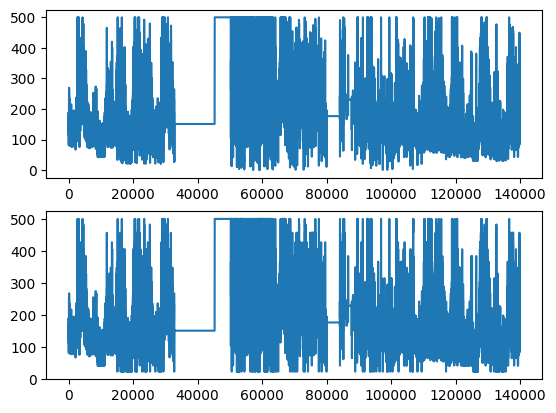

In [164]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig,ax = plt.subplots(2,1)
ax[0].plot(range(i+1), Y.numpy())
ax[1].plot(range(i+1), preds10)